# Numerical Solution of FDE

## Introduction

$$
D_{*0}^{n} y(x) = f(x, y(x))
$$

$$
D^{k} y(0) = y_0^{(k)}, \quad k=0,1,\cdots,\lceil n\rceil - 1
$$

Lemma 6.2, Volterra integral equation

$$
y(x) = \sum_{k=0}^{m-1} \frac{x^k}{k!} D^k y(0) + \frac{1}{\Gamma(n)} \int_0^x (x-t)^{n-1} f(t, y(t)) \mathrm{d} t
$$

with $m=\lceil n\rceil$

a fractional variant method of the classical second-order **Adams–Bashforth–Moulton method**

### Integral Scheme

$$\begin{cases}
D y(x) &= f(x, y(x)) \\
y(0) &= y_0
\end{cases}$$

use the predictor-corrector technique of Adams

$\{t_j=jh: j=0,1,\cdots,N\}$ with some interger $N$ and $h=T/N$

$$
y_{k+1} = y_k + \int_{x_k}^{x_{k+1}} f(t, y(t)) \mathrm{d} t
$$

$$
y_{k+1} = y_k + \frac{h}{2} \left(f(t_k, y_k) + f(t_{k+1}, y^P_{k+1})\right)
$$

### Fractional Scheme

Fractional Formulation

$$
y(x) = \sum_{k=0}^{m-1} \frac{x^k}{k!} D^k y(0) + \frac{1}{\Gamma(n)} \int_0^x (x-t)^{n-1} f(t, y(t)) \mathrm{d} t
$$

$$
\int_0^{t_{k+1}} (t_{k+1} - z)^{n-1} g(z) \mathop{}\!\mathrm{d} z \approx \int_0^{t_{k+1}} (t_{k+1} - z)^{n-1} \tilde{g}_{k+1}(z) \mathrm{d} z
$$

where $\tilde{g}$ is the piecewise linear interpolant for $g$ with nodes and knots chosen at the $t_j,\; j=0,1,2,\cdots,k+1$.

$$\tag{1}
y_{k+1} = \sum_{j=0}^{m-1} \frac{t_{k+1}^{j}}{j!} y_0^{(j)} + \frac{1}{\Gamma(n)} \left(\sum_{j=0}^{k} a_{j, k+1} f(t_j, y_j) + a_{k+1, k+1} f(t_{k+1}, y_{k+1}^{P}) \right)
$$

$$\tag{2}
y_{k+1}^{P} = \sum_{j=0}^{m-1} \frac{t_{k+1}^{j}}{j!} y_0^{(j)} + \frac{1}{\Gamma(n)} \sum_{j=0}^{k} b_{j, k+1} f(t_{j}, y_{j})
$$

$$\tag{3}
\begin{aligned}
    a_{j, k+1} &= \begin{cases}
        \frac{h^n}{n(n+1)} \left(k^{n+1}-(k-n)(k+1)^{n}\right) & \text{ if } j=0, \\
        \frac{h^n}{n(n+1)} \left((k-j+2)^{n+1}+(k-j)^{n+1}-2(k-j+1)^{n+1}\right) & \text{ if } 1\leq j\leq k, \\
        \frac{h^n}{n(n+1)} & \text{ if } j=k+1 \\
    \end{cases} \\
    b_{j,k+1} &= \begin{cases}
        \frac{h^n}{n} \left((k+1-j)^n-(k-j)^n\right) & \text{ if equispaced} \\
        \frac{(t_{k+1}-t_{j})^n - (t_{k+1}-t_{j+1})^n}{n} & \text{ else } \\
    \end{cases} \\
\end{aligned}
$$

## Packages

### Basic Packages

In [1]:
import numpy as np
import scipy as sp

In [2]:
from scipy.special import gamma

In [3]:
import matplotlib
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    # "font.family": "sans-serif",
    "font.family": "Times New Roman",
})

### Plotting Configuration

In [4]:
line_styles = [
    'solid', 
    (0, (18, 15)), 
    'dashed', 
    (0, (18, 10, 1, 10)), 
    (0, (18, 8, 1, 5, 1, 8)),
    "-.",
    (0, (1, 10))
]

In [5]:
title_style = {
    "fontfamily": "Times New Roman",
    "fontsize": 20,
    "y": 1.05,
}

In [6]:
label_style = {
    "fontfamily": "Times New Roman",
    "fontsize": 18
}

In [7]:
legend_style = {
    "shadow": True,
    "loc": 'best',
    "labelspacing": 0.2,
    "columnspacing": 0.8,
    "handletextpad": 0.5,
    "prop": {
        "size": 14,
        "family": "Arial"
    }
}

In [8]:
tick_style = {
    "labelsize": 14
}

In [9]:
line_style = {
    "alpha": 1.,
    "linewidth": 1.2,
}

In [10]:
def get_ax(title="", xlabel=r"\textbf{x}", ylabel=r"\textbf{y}"):
    fig_0, ax_0 = plt.subplots(
        figsize=(8, 6),
        tight_layout=True
    )

    ax_0.tick_params(
        **tick_style
    )
    ax_0.set_xlabel(
        xlabel,
        **label_style
    )
    ax_0.set_ylabel(
        ylabel,
        **label_style
    )
    ax_0.set_title(
        title,
        **title_style
    )
    
    return fig_0, ax_0

In [11]:
def set_ax(ax_0, legend=True):
    if legend:
        ax_0.legend(
            **legend_style
        )

    ax_0.ticklabel_format(
        axis='y',
        style='scientific',
        useMathText=True,
        scilimits=(-3, 4)
    )
    tx = ax_0.yaxis.get_offset_text()
    tx.set_fontname('Times New Roman')
    tx.set_fontsize(16)

### Functions & Classes

In [12]:
class TimeSpace:
    domain: np.ndarray
    seq: np.ndarray
    n: int
    h: float
    
    def __init__(self, opt):
        self.init(opt)

    def init(self, opt):
        self.domain = opt["domain"]
        self.n = opt["n"]
        self.h = (self.domain[1] - self.domain[0]) / self.n
        self.seq = np.linspace(*self.domain, self.n + 1)
        
    def __getitem__(self, key):
        return self.seq[key]

In [13]:
def _get_a_list(h, k0, dn):
    temp = h**dn / (dn * (dn + 1))
    temp_a_list = list()
    for j in range(0, k0 + 2):
        if j == 0:
            temp_a_list.append(
                temp * (k0**(dn + 1) - (k0 - dn) * (k0 + 1)**dn)
            )
        elif 0 < j < k0 + 1:
            temp_a_list.append(
                temp * (
                    (k0 - j + 2)**(dn + 1) + 
                    (k0 - j)**(dn + 1) - 
                    2 * (k0 - j + 1)**(dn + 1))
            )
        elif j == k0 + 1:
            temp_a_list.append(temp)
        else:
            raise ValueError
    return temp_a_list

In [14]:
def _get_b_list(h, k0, dn):
    temp_b_list = list()
    for j in range(0, k0 + 1):
        temp_b_list.append(
            h**dn / dn * ((k0 + 1 - j)**dn - (k0 - j)**dn)
        )
    return temp_b_list

In [15]:
class Adams(object):
    def __init__(self, func, dy0, dn, time_opt):
        self.func = func
        self.dy0 = dy0 if isinstance(dy0, (list, tuple)) else [dy0]
        self.dy0 = np.array(self.dy0)
        self.dn = dn
        
        self.m = int(np.ceil(dn))
        
        self.t = TimeSpace(time_opt)
        
        self._a_list = [None]
        self._b_list = []
        self.y = [self.dy0[0]]
        
        self.k = 0

    @property
    def a(self):
        n_a = len(self._a_list)
        if n_a < self.k + 1:
            self._a_list = _get_a_list(
                h=self.t.h,
                k0=self.k - 1, 
                dn=self.dn
            )
        return self._a_list
        
    @property
    def b(self):
        """
        equispaced case.
        """
        n_b = len(self._b_list)
        if n_b < self.k:
            self._b_list = _get_b_list(
                h=self.t.h,
                k0=self.k - 1, 
                dn=self.dn
            )
        return self._b_list
    
    @property
    def yp(self):
        k = self.k
        expr1 = np.sum([
            self.t[k]**j / gamma(j + 1) * self.dy0[j]
            for j in range(0, self.m)
        ], axis=0)
        expr2 = np.sum([
            self.b[j] * self.func(self.t[j], self.y[j])
            for j in range(0, k)
        ], axis=0)
        return expr1 + expr2 / gamma(self.dn)

    @property
    def y1(self):
        k = self.k
        expr1 = np.sum([
            self.t[k]**j / gamma(j + 1) * self.dy0[j]
            for j in range(0, self.m)
        ], axis=0)
        expr2 = np.sum([
            self.a[j] * self.func(self.t[j], self.y[j])
            for j in range(0, k)
        ], axis=0) + (
            self.a[k] * self.func(self.t[k], self.yp)
        )
        return expr1 + expr2 / gamma(self.dn)
    
    def iterator(self):
        for i in range(1, self.t.n + 1):
            self.k += 1
            self.y.append(self.y1)
        return np.array(self.y).squeeze()

## Examples

### ex.1 two functions coincide at $x_1$ but nowhere else

**Theorem 6.A.** ...

**Example 6.1** Let $0 < n < 1$ and consider the fractional differential equations

$$
D_{*0}^{n} y(x) = \Gamma(n+1)
$$

with initial conditions $y_1(0)=0,\; y_2(1)=1$

#### Numerical

In [16]:
n = 1 / 4

In [17]:
test_11 = Adams(
    func=lambda t, y: gamma(n + 1),
    dy0=[np.array([0.])],
    dn=n,
    time_opt={
        "domain": np.array([0., 2.]),
        "n": 200
    }
)
y_data_11 = test_11.iterator()

In [18]:
test_12 = Adams(
    func=lambda t, y: gamma(n + 1),
    dy0=[np.array([1.])],
    dn=n,
    time_opt={
        "domain": np.array([1., 2.]),
        "n": 200
    }
)
y_data_12 = test_12.iterator()

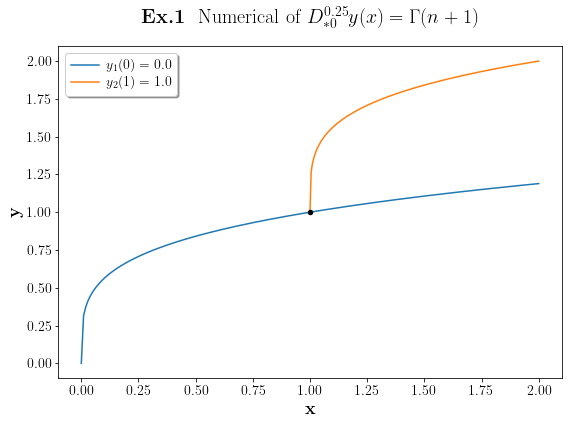

In [19]:
fig, ax = get_ax(
    title=f"\\textbf{{Ex.1 }} Numerical of $D_{{*0}}^{{{n}}}y(x)=\\Gamma(n+1)$"
)

ax.plot(
    test_11.t.seq, y_data_11,
    label=f"$y_1(0)={test_11.dy0[0, 0]}$"
)
ax.plot(
    test_12.t.seq, y_data_12, 
    label=f"$y_2(1)={test_12.dy0[0, 0]}$"
)

ax.scatter(
    [1.], y_data_12[0],
    color="black",
    s=20,
    zorder=3
)

set_ax(ax)

#### Analytical

In [20]:
t_seq_11 = test_11.t.seq
t_seq_12 = test_12.t.seq

y_analytic_11 = t_seq_11**n
y_analytic_12 = 1 + (t_seq_12 - 1.)**n

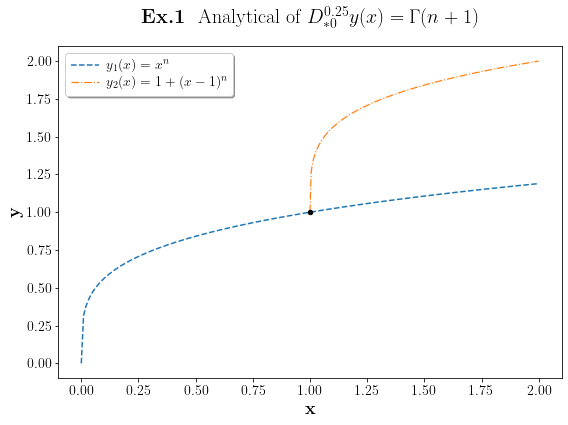

In [21]:
fig, ax = get_ax(
    title=f"\\textbf{{Ex.1 }} Analytical of $D_{{*0}}^{{{n}}}y(x)=\\Gamma(n+1)$"
)

ax.plot(
    t_seq_11, y_analytic_11,
    linestyle="--",
    label="$y_1(x)=x^n$"
)
ax.plot(
    test_12.t.seq, y_analytic_12, 
    linestyle="-.",
    label="$y_2(x)=1+(x-1)^n$",
    **line_style
)

ax.scatter(
    [1.], y_analytic_12[0],
    color="black",
    s=20,
    zorder=3
)

set_ax(ax)

#### Error Analysis

In [22]:
y_error_11 = y_data_11 - y_analytic_11
y_error_12 = y_data_12 - y_analytic_12

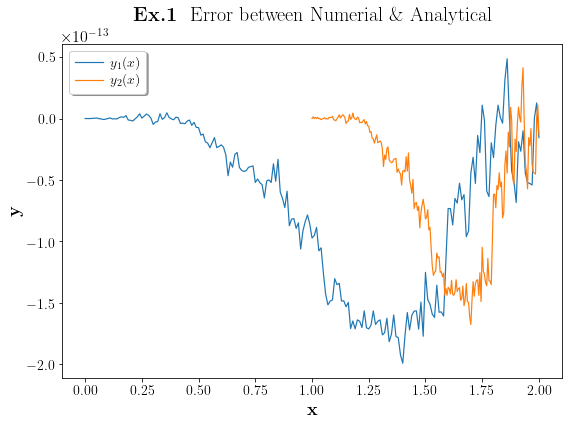

In [23]:
fig, ax = get_ax(
    title=r"\textbf{Ex.1 } Error between Numerial \& Analytical"
)

ax.plot(
    test_11.t.seq, y_error_11,
    label="$y_1(x)$",
    **line_style
)
ax.plot(
    test_12.t.seq, y_error_12, 
    label="$y_2(x)$",
    **line_style
)

set_ax(ax)

### ex.2

**Theorem 6.12.** ...

**Example 6.2** We verify the statement of Theorem 6.12 by looking at the differential equation

$$
D_{*0}^{0.28} y(x)=(0.5-x) \sin y(x) +0.8x^3
$$

with initial conditions 

$$
y_0(0)=1.7, y_1(0)=1.6, y_2(0)=1.5, y_3(0)=1.4, y_4(0)=1.3, y_5(0)=1.2
$$

#### Numerical

In [24]:
test_2 = Adams(
    func=lambda t, y: (0.5 - t) * np.sin(y) + 0.8 * t**3,
    dy0=[np.array([1.7, 1.6, 1.5, 1.4, 1.3, 1.2])],
    dn=0.28,
    time_opt={
        "domain": np.array([0., 1.]),
        "n": 200
    }
)
y_data_2 = test_2.iterator()

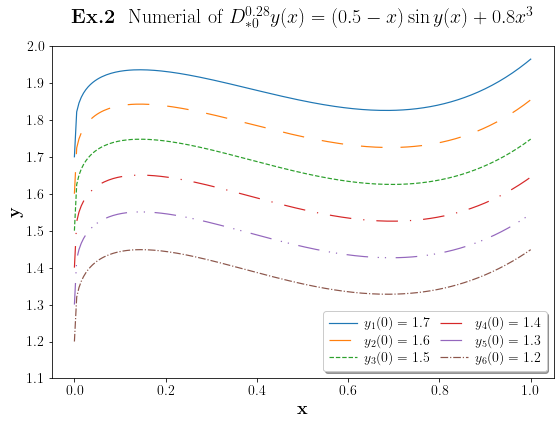

In [25]:
fig, ax = get_ax(
    title=r"\textbf{Ex.2 } Numerial of $D_{*0}^{0.28} y(x)=(0.5-x) \sin y(x) +0.8x^3$"
)

for i in range(y_data_2.shape[1]):
    ax.plot(
        test_2.t.seq, y_data_2[:, i],
        # color="black",
        linestyle=line_styles[i],
        label=f"$y_{i+1}(0)={test_2.dy0[0, i]}$",
        **line_style
    )

ax.set_ylim(1.1, 2.0)

ax.legend(
    ncol=2,
    **legend_style
)

### ex.3



$$
D_{*0}^{1/2} y(x)=\sin y(x), \quad y(1)=2.5
$$

with initial conditions

$$
y_1(0)=1., y_2(0)=2., y_3(0)=1.5, y_4(0)=1.75, y_5(0)=1.625, y_6(0)=1.6875, y_7(0)=1.71875
$$

#### Numerical

In [26]:
test_3 = Adams(
    func=lambda t, y: np.sin(y),
    dy0=[np.array([1., 2., 1.5, 1.75, 1.625, 1.6875, 1.71875])],
    dn=0.5,
    time_opt={
        "domain": np.array([0., 1.]),
        "n": 200
    }
)
y_data_3 = test_3.iterator()

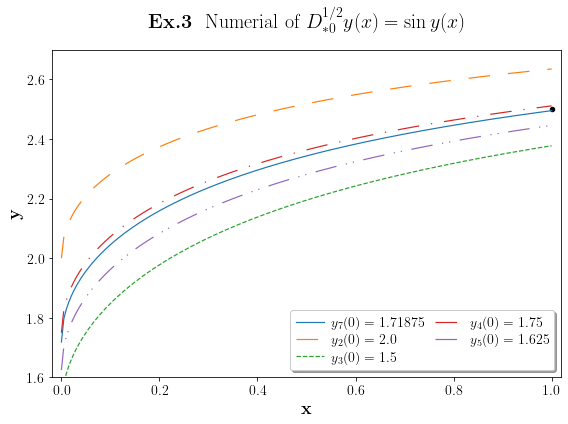

In [27]:
fig, ax = get_ax(
    title=r"\textbf{Ex.3 } Numerial of $D_{*0}^{1/2} y(x)=\sin y(x)$"
)

plot_list = [6, 1, 2, 3, 4]

for k, i in enumerate(plot_list):
    ax.plot(
        test_3.t.seq, y_data_3[:, i],
        # color="black",
        linestyle=line_styles[k],
        label=f"$y_{i+1}(0)={test_3.dy0[0, i]}$",
        **line_style
    )
    
ax.scatter(
    [1.], [2.5],
    color="black",
    s=20
)
    
ax.set_xlim(-0.02, 1.02)
ax.set_ylim(1.6, 2.7)

ax.legend(
    ncol=2,
    **legend_style
)

### ex.4

$$
D_{*0}^n y(x) = \frac{40320}{\Gamma(9-n)} x^{8-n} - 3\frac{\Gamma(5+n/2)}{\Gamma(5+n/2)} x^{4-n/2} + \frac{9}{4}\Gamma(n+1) + \left(\frac{3}{2} x^{n/2} - x^4\right) - [y(x)]^{3/2},\quad x\in [0, 1], n > 1
$$

with initial condition $y(0)=0, y'(0)=0$.

The exact solution of this initial value problem is

$$
y(x) = x^8 - 3 x^{4+n/2} + \frac{9}{4} x^n
$$

hence

$$
D_{*0}^n y(x) = \frac{40320}{\Gamma(9-n)} x^{8-n} - 3\frac{\Gamma(5+n/2)}{\Gamma(5+n/2)} x^{4-n/2} + \frac{9}{4}\Gamma(n+1)
$$

#### Numerical

In [28]:
n = 1.25

def fun_4(t, y):
    expr1 = 40320/gamma(9-n) * t**(8-n)
    expr2 = 3 * gamma(5+n/2) / gamma(5-n/2) * t**(4-n/2)
    expr3 = 9/4 * gamma(n + 1)
    expr4 = (3/2 * t**(n/2) - t**4)**3
    expr5 = y**(3/2)
    return expr1 - expr2 + expr3 + expr4 - expr5

In [29]:
test_4 = Adams(
    func=fun_4,
    dy0=[np.array([0]), np.array([0])],
    dn=n,
    time_opt={
        "domain": np.array([0., 1.]),
        "n": 200
    }
)
y_data_4 = test_4.iterator()

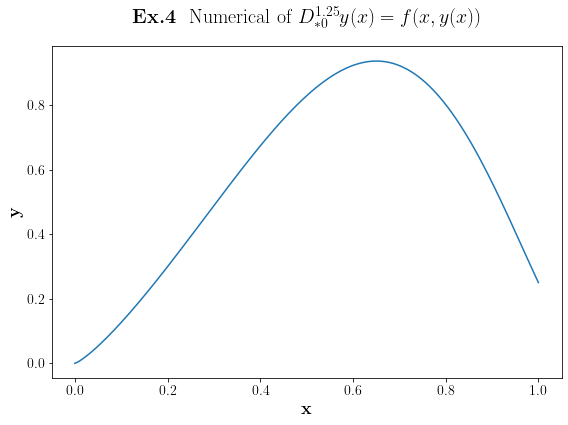

In [30]:
fig, ax = get_ax(
    title=f"\\textbf{{Ex.4 }} Numerical of $D_{{*0}}^{{{n}}}y(x)=f(x, y(x))$"
)

ax.plot(
    test_4.t.seq, y_data_4,
)

set_ax(ax, legend=False)

#### Analytical

In [31]:
t_seq_4 = test_4.t.seq

y_analytic_4 = t_seq_4**8 - 3 * t_seq_4**(4+n/2) + 9/4 * t_seq_4**n

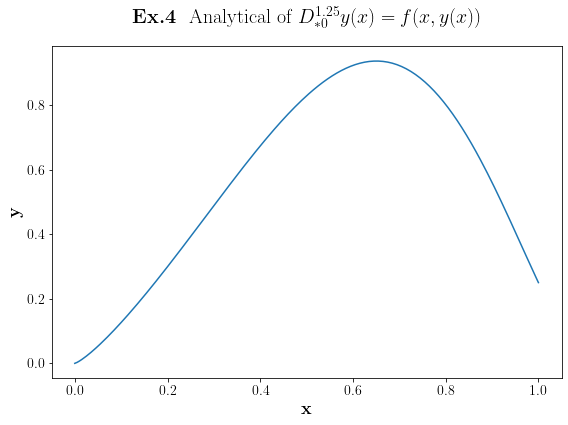

In [32]:
fig, ax = get_ax(
    title=f"\\textbf{{Ex.4 }} Analytical of $D_{{*0}}^{{{n}}}y(x)=f(x, y(x))$"
)

ax.plot(
    t_seq_4, y_analytic_4,
)

set_ax(ax, legend=False)

#### Error Analysis

In [33]:
y_error_4 = y_data_4 - y_analytic_4

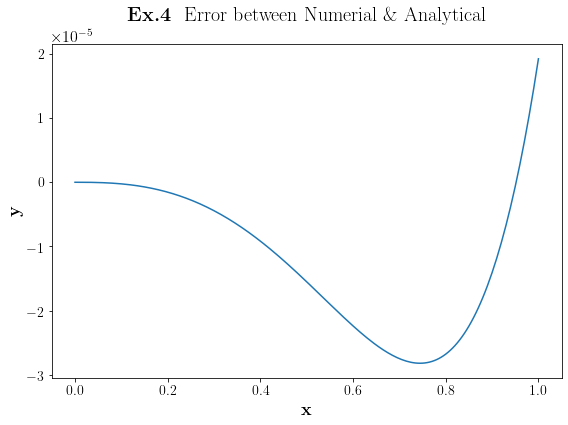

In [34]:
fig, ax = get_ax(
    title="\\textbf{{Ex.4 }} Error between Numerial \& Analytical"
)

ax.plot(
    t_seq_4, y_error_4,
)

set_ax(ax, legend=False)

#### Error Order

In [35]:
n_iter = 7
step_n = 10
y_4_end_list = list()

for i in range(7):
    print("+", end="")
    test_4_item = Adams(
        func=fun_4,
        dy0=[np.array([0]), np.array([0])],
        dn=n,
        time_opt={
            "domain": np.array([0., 1.]),
            "n": step_n
        }
    )
    y_data_4_item = test_4_item.iterator()
    y_4_end_list.append([step_n, y_data_4_item[-1] - y_analytic_4[-1]])
    step_n *= 2

+++++++

In [36]:
from prettytable import PrettyTable

In [37]:
y_4_analysis_list = list()

for i, (item_step_n, item_v) in enumerate(y_4_end_list):
    y_4_analysis_list.append([item_step_n, item_v])
    if i == 0:
        y_4_analysis_list[i].append(0)
    else:
        y_4_analysis_list[i].append(
            np.log2(y_4_analysis_list[i-1][1] / y_4_analysis_list[i][1])
        )

In [38]:
y_4_table = PrettyTable()

y_4_table.field_names = ["step size", "Error of Adams scheme", "Error Order"]
y_4_table.add_rows([
    [item[0], f"{item[1]: .4e}", f"{item[2]: .4e}" if i != 0 else ""]
    for i, item in enumerate(y_4_analysis_list)
])

In [39]:
print(y_4_table.get_string())

+-----------+-----------------------+-------------+
| step size | Error of Adams scheme | Error Order |
+-----------+-----------------------+-------------+
|     10    |       5.5326e-03      |             |
|     20    |       1.5932e-03      |  1.7960e+00 |
|     40    |       4.3283e-04      |  1.8801e+00 |
|     80    |       1.1434e-04      |  1.9205e+00 |
|    160    |       2.9741e-05      |  1.9428e+00 |
|    320    |       7.6631e-06      |  1.9564e+00 |
|    640    |       1.9620e-06      |  1.9656e+00 |
+-----------+-----------------------+-------------+
